In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 1
%aimport gpe

In [3]:
def v_trap(r):
    return 0.5 * r**2.

i =  0 mu = +1.0000
i =  1 mu = +0.3643
i =  2 mu = -1.0093
i =  3 mu = -4.3186
i =  4 mu = -13.0963
i =  5 mu = -26.3703
i =  6 mu = -2211.3258


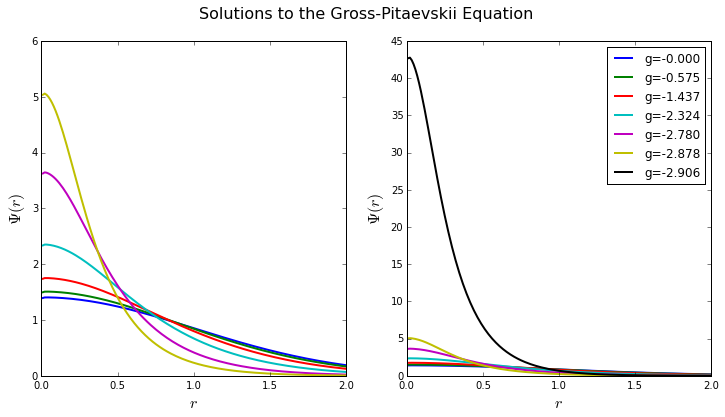

In [27]:
n_vals = np.array([0.0, 0.3663, 0.9147, 1.4798, 1.7695, 1.8319, 1.85])
n_particles = 2.
g_vals = -n_vals * np.pi / n_particles
f, axarr = plt.subplots(1, 2, figsize=(12, 6), dpi=100, facecolor='w', edgecolor='k')
for i, g in enumerate(g_vals):
    p = gpe.GPESolver(v_trap=v_trap, g=g, N=n_particles, npts=500, R=6.0, dim=2, lam=0.)
    if i==0:
        y, mu = p.solve()
    else:
        y, mu = p.solve(xin=y)
    psi = p.get_psi(y)
    if i < 6:
        axarr[0].plot(p.basis.x, p.get_psi(y), label=r'g={g:+5.3f}'.format(g=g), linewidth=2.0)
    axarr[1].plot(p.basis.x, p.get_psi(y), label=r'g={g:+5.3f}'.format(g=g), linewidth=2.0)
    print 'i = {i:2d}'.format(i=i), 'mu = {mu:+6.4f}'.format(mu=mu)
    
axarr[0].set_xlim(0, 2)
axarr[0].set_ylim(0, 6)
axarr[1].set_xlim(0, 2)
axarr[1].set_ylim(0, 45)
axarr[1].legend();
axarr[0].set_xlabel(r'$r$', fontsize=16)
axarr[0].set_ylabel(r'$\Psi(r)$', fontsize=16)
axarr[1].set_xlabel(r'$r$', fontsize=16)
axarr[1].set_ylabel(r'$\Psi(r)$', fontsize=16)
f.suptitle('Solutions to the Gross-Pitaevskii Equation', fontsize=16)
f.savefig('/Users/Adam/Desktop/tryme.png', dpi=100, bbox_inches='tight')